In [22]:
from pathlib import Path
import matplotlib.pyplot as plt
from Datasets.CASIA2 import CASIA2
from Datasets.Utilities.Maps.Noiseprint.noiseprint import normalize_noiseprint
from tensorflow import keras
from IPython.display import HTML, display
import tabulate

In [2]:
#Download and prepare the dataset
#This will take a while since we have to process each image singularly to extract the noise features
from Geneartors.CASIA2.Casia2Generator import Casia2Generator
from Models.Customs.BaseClassifier import BaseClassifier
from Models.utilities import test_model
#from Models.Customs.ClassifierType1 import ClassifierType1
from Utilities.Plots import plot_model_data
dataset = CASIA2()
dataset.download_and_prepare()

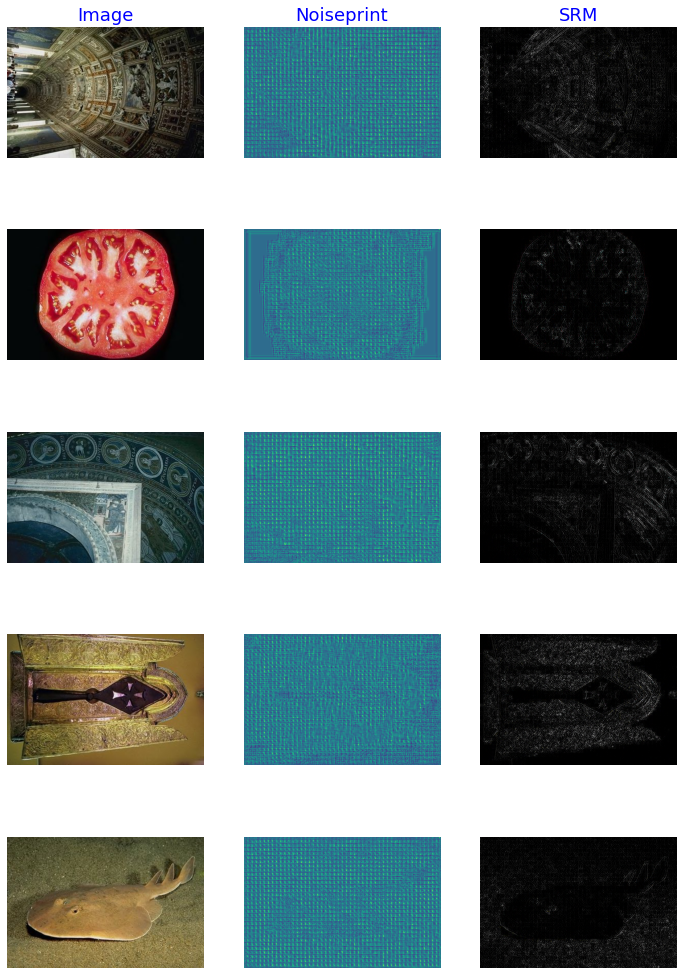

In [3]:
train_split = dataset.as_dataset(split="train")

n_cols = 3

nsamples = 5

samples = train_split.take(nsamples)

col_titles = ['Image','Noiseprint','SRM'] 

nrows = nsamples
ncols = 3

fig, axes = plt.subplots(nrows,ncols,figsize=(12,18))  # create the figure with subplots
[ax.set_axis_off() for ax in axes.ravel()]  # remove the axis

for ax, col in zip(axes[0], col_titles): # set up the title for each column
    ax.set_title(col,fontdict={'fontsize':18,'color':'b'})

i = 0
for sample in samples:
    axes[i,0].imshow(sample["image"])
    axes[i,1].imshow(normalize_noiseprint(sample["noiseprint"].numpy()))
    axes[i,2].imshow(sample["SRM"])
    i = i + 1 
      

In [4]:
#Define parameters essentials for the training of the models

#Define input parameters
input_shape_rgb = (256, 384, 3)
input_shape_srm = (256, 384, 3)
input_shape_noiseprint = (256, 384, 1)

#We just have to distinguish between tampered and pristine images
#and a single class is enough for that
output_classes = 1

#Define the loss the models will use
loss_function = "binary_crossentropy"

#Define the number of epochs each model has to be trained for
epochs = 20

#define the size of each training batch
batch_size = 64

In [5]:
#Define additional parameters not essentials for the training

#Set the path to the Log folder in which the logs, the checkpoints and other usefull
#data will be used
logs_folder = Path("../Logs")

#Set verbose = True if you want an extensive printing of logs during the training
# and testing of the models
verbose = True

In [6]:
# Create 2 generator of datas that has that provide samples with the following structure:
#   X -> RGB image
#   Y -> class of the image
# The first generator will produce training data, the second will produce validation data

generator_training = Casia2Generator(dataset.as_dataset(split="train"),"image",batch_size)
generator_validation = Casia2Generator(dataset.as_dataset(split="validation"),"image",batch_size)
#Train a Resnet Classifier using the RGB data
model_rgb = BaseClassifier(input_shape_rgb,output_classes,"RGB model",logs_folder,False,0.2,verbose)
history_rgb , rgb_model_path, rgb_checkpoint_path = model_rgb.train_model(generator_training,generator_validation,epochs,loss_function,save_model=True)

Model structure:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 384, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 384, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 256, 384, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 192, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 192, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 192, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128

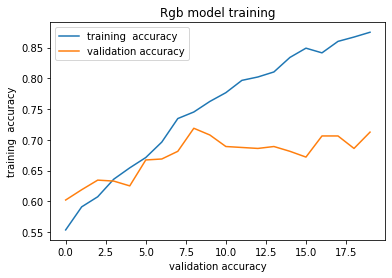

In [7]:
plot_model_data(history_rgb,("accuracy","val_accuracy"),("training  accuracy","validation accuracy"),"Rgb model training")

In [6]:
# Create 2 generator of datas that has that provide samples with the following structure:
#   X -> Noiseprint
#   Y -> class of the image
# The first generator will produce training data, the second will produce validation data
generator_training = Casia2Generator(dataset.as_dataset(split="train"),"noiseprint",batch_size)
generator_validation = Casia2Generator(dataset.as_dataset(split="validation"),"noiseprint",batch_size)

#Train a Resnet Classifier using the Noiseprint data
model_noiseprint = BaseClassifier(input_shape_noiseprint,output_classes,"Noiseprint model",logs_folder,False,0.2,verbose)
history_noiseprint , model_noiseprint_path, checkpoint_noiseprint_path = model_noiseprint.train_model(generator_training,generator_validation,epochs,loss_function,save_model=True)

Model structure:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 384, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 256, 384, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 256, 384, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 192, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 192, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 192, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128

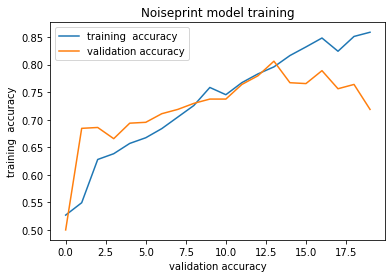

In [7]:
plot_model_data(history_noiseprint,("accuracy","val_accuracy"),("training  accuracy","validation accuracy"),"Noiseprint model training")

In [ ]:
# Create 2 generator of datas that has that provide samples with the following structure:
#   X -> SRM
#   Y -> class of the image
# The first generator will produce training data, the second will produce validation data

generator_training = Casia2Generator(dataset.as_dataset(split="train"),"SRM",batch_size)
generator_validation = Casia2Generator(dataset.as_dataset(split="validation"),"SRM",batch_size)
#Train a Resnet Classifier using the RGB data
model_srm = BaseClassifier(input_shape_srm,output_classes,"SRM model",logs_folder,False,0.2,verbose)
history_srm , model_srm_path, checkpoint_srm_path = model_srm.train_model(generator_training,generator_validation,epochs,loss_function,save_model=True)

Model structure:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 384, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 256, 384, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256, 384, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 192, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 192, 64)      18496     
_________________________________________________________________
activation_6 (Activation)    (None, 128, 192, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1

In [ ]:
plot_model_data(history_srm,("accuracy","val_accuracy"),("training  accuracy","validation accuracy"),"SRM model training")

In [17]:
rgb_checkpoint_path = "../Logs/models/RGB model/Feb022021200611/best_model.h5"
checkpoint_noiseprint_path = "../Logs/models/Noiseprint model/Feb022021221628/best_model.h5"

In [15]:
base_test_sets = ['test']
blur_test_sets = ['test_blur_2', 'test_blur_5', 'test_blur_7'] 
salt_test_sets = ['test_salt_4', 'test_salt_5', 'test_salt_6']
exposed_test_sets = ['test_exposed_20', 'test_exposed_50', 'test_exposed_70']
compression_test_sets = ['test_compressed_20', 'test_compressed_50','test_compressed_75']


In [30]:
model_rgb = keras.models.load_model(rgb_checkpoint_path)

res_rgb_blur = ["Blur attack"]+test_model(model_rgb,"image",blur_test_sets)
res_rgb_salt = ["Salt attack"]+test_model(model_rgb,"image",salt_test_sets)
res_rgb_exposed = ["Exposition attack"]+test_model(model_rgb,"image",exposed_test_sets)
res_rgb_compression = ["Compression attack"]+test_model(model_rgb,"image",compression_test_sets)

table = [res_rgb_blur,res_rgb_salt,res_rgb_exposed,res_rgb_compression]

display(HTML(tabulate.tabulate(table, tablefmt='html',headers=["Strength 1","Strength 2","Strength 3"])))

20/20 [==============================] - 2s 92ms/step - loss: 0.6451 - accuracy: 0.6703
The accuracy of the model using RGB data is 0.6734374761581421% over the authentic dataset.


,Strength 1,Strength 2,Strength 3
Blur attack,0.671875,0.6625,0.625
Salt attack,0.664062,0.665625,0.6625
Exposition attack,0.667188,0.635938,0.609375
Compression attack,0.690625,0.696875,0.670313


In [31]:
model_noiseprint = keras.models.load_model(checkpoint_noiseprint_path)
generator_test = Casia2Generator(dataset.as_dataset(split="test"),"noiseprint",32)

res_blur = ["Blur attack"]+test_model(model_noiseprint,"noiseprint",blur_test_sets)
res_salt = ["Salt attack"]+test_model(model_noiseprint,"noiseprint",salt_test_sets)
res_exposed = ["Exposition attack"]+test_model(model_noiseprint,"noiseprint",exposed_test_sets)
res_compression = ["Compression attack"]+test_model(model_noiseprint,"noiseprint",compression_test_sets)

table = [res_blur,res_salt,res_exposed,res_compression]

display(HTML(tabulate.tabulate(table, tablefmt='html',headers=["Attack\Level","Strength 1","Strength 2","Strength 3"])))

20/20 [==============================] - 1s 48ms/step - loss: 0.8748 - accuracy: 0.5766
The accuracy of the model using Noiseprint data is 0.753125011920929% over the authentic dataset.


Attack\Level,Strength 1,Strength 2,Strength 3
Blur attack,0.529688,0.515625,0.5375
Salt attack,0.667188,0.629687,0.5625
Exposition attack,0.729688,0.707812,0.665625
Compression attack,0.495313,0.509375,0.576563
